<a href="https://colab.research.google.com/github/Gena5566/Pathologies_ArtDental_g/blob/main/DICOM_files.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 12.0 MB/s eta 0:00:00


In [ ]:
pip install pillow

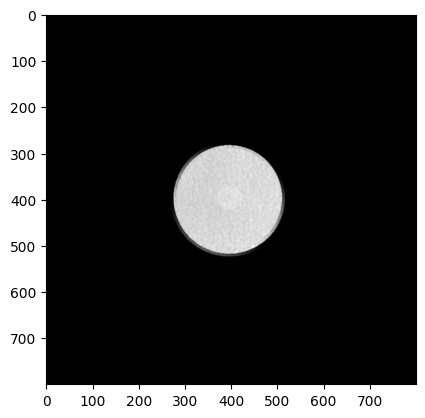

In [ ]:
import matplotlib.pyplot as plt
from pydicom import dcmread
from pydicom.data import get_testdata_file

# The path to a pydicom test dataset
path = "/content/ARSENTEVA IRINA SERGEEVNA_16678_0001.dcm"
ds = dcmread(path)
# `arr` is a numpy.ndarray
arr = ds.pixel_array

plt.imshow(arr, cmap="gray")
plt.show()

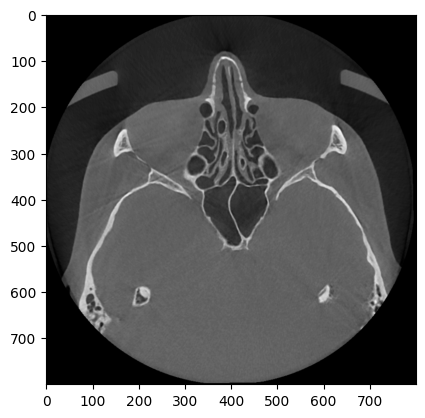

In [ ]:
import pydicom
from PIL import Image
import matplotlib.pyplot as plt

def convert_dicom_to_image(dicom_file_path, output_image_path):
    # Чтение DICOM-файла
    dicom_data = pydicom.dcmread(dicom_file_path)

    # Извлечение пиксельных данных
    pixel_data = dicom_data.pixel_array

    # Преобразование пиксельных данных в режим 'L' (градации серого)
    image = Image.fromarray(pixel_data).convert('L')

    # Сохранение изображения в формате JPEG
    image.save(output_image_path)

    # Отображение изображения с использованием Matplotlib
    plt.imshow(pixel_data, cmap='gray')
    plt.show()

# Пример использования
dicom_file_path = '/content/ARSENTEVA IRINA SERGEEVNA_16678_0238.dcm'
output_image_path = '/content/image1.jpeg'
convert_dicom_to_image(dicom_file_path, output_image_path)



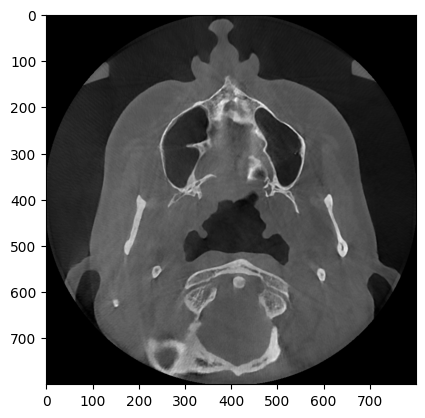

In [ ]:
import matplotlib.pyplot as plt
from pydicom import dcmread

# Путь к DICOM-файлу
path_to_dicom_file = "/content/ARSENTEVA IRINA SERGEEVNA_16678_0402.dcm"

# Чтение DICOM-файла
ds = dcmread(path_to_dicom_file)

# `arr` is a numpy.ndarray
arr = ds.pixel_array

# Отображение изображения
plt.imshow(arr, cmap="gray")
plt.show()


In [ ]:
import pydicom

def read_dicom_info(file_path):
    # Чтение DICOM-файла
    dicom_data = pydicom.dcmread(file_path)

    # Вывод информации
    print("Patient Information:")
    print(f"  Patient Name: {dicom_data.PatientName}")
    print(f"  Patient ID: {dicom_data.PatientID}")
    print(f"  Patient Birth Date: {dicom_data.PatientBirthDate}")
    print(f"  Patient Sex: {dicom_data.PatientSex}")

    print("\nImage Information:")
    print(f"  Study Date: {dicom_data.StudyDate}")
    print(f"  Modality: {dicom_data.Modality}")
    print(f"  Image Type: {dicom_data.ImageType}")
    print(f"  Rows: {dicom_data.Rows}")
    print(f"  Columns: {dicom_data.Columns}")

    print("\nStudy Information:")
    print(f"  Study Description: {dicom_data.StudyDescription}")
    print(f"  Study Instance UID: {dicom_data.StudyInstanceUID}")

    print("\nSeries Information:")
    if hasattr(dicom_data, 'SeriesDescription'):
        print(f"  Series Description: {dicom_data.SeriesDescription}")
    else:
        print("  Series Description: Not available")

    print("\nPixel Information:")
    print(f"  Pixel Spacing: {dicom_data.PixelSpacing}")
    print(f"  Bits Allocated: {dicom_data.BitsAllocated}")
    print(f"  Bits Stored: {dicom_data.BitsStored}")
    print(f"  High Bit: {dicom_data.HighBit}")

    print("\nAdditional Information:")
    print(f"  SOP Class UID: {dicom_data.SOPClassUID}")
    print(f"  Transfer Syntax: {dicom_data.file_meta.TransferSyntaxUID}")

# Пример использования
dicom_file_path = '/content/ARSENTEVA IRINA SERGEEVNA_16678_0402.dcm'
read_dicom_info(dicom_file_path)


Patient Information:
  Patient Name: ARSENTEVA IRINA SERGEEVNA
  Patient ID: 16678
  Patient Birth Date: 19830716
  Patient Sex: F

Image Information:
  Study Date: 20231105
  Modality: CT
  Image Type: ORIGINAL/PRIMARY/AXIAL
  Rows: 800
  Columns: 800

Study Information:
  Study Description: 
  Study Instance UID: 1.2.276.0.7230010.3.1.2.2290667817.35916.1699189734.724

Series Information:
  Series Description: Not available

Pixel Information:
  Pixel Spacing: [0.20, 0.20]
  Bits Allocated: 16
  Bits Stored: 16
  High Bit: 15

Additional Information:
  SOP Class UID: 1.2.840.10008.5.1.4.1.1.2
  Transfer Syntax: 1.2.840.10008.1.2.1


In [ ]:
import pydicom

def extract_structured_report(dicom_file_path):
    # Чтение DICOM-файла
    dicom_data = pydicom.dcmread(dicom_file_path)

    # Проверка, является ли файл структурированным отчетом
    if "StructuredReport" not in dicom_data.Modality:
        print("Файл не является структурированным отчетом.")
        return None

    # Извлечение структурированного отчета
    structured_report = dicom_data.StructuredReportSequence

    # Вывод информации о диагнозах (пример)
    for item in structured_report:
        if hasattr(item, 'TextValue') and "DIAGNOSIS" in item.TextValue:
            print(f"Диагноз: {item.TextValue}")

    return structured_report

# Пример использования
dicom_file_path = '/content/ARSENTEVA IRINA SERGEEVNA_16678_0402.dcm'
extracted_report = extract_structured_report(dicom_file_path)


Файл не является структурированным отчетом.



File path........: /content/ARSENTEVA IRINA SERGEEVNA_16678_0402.dcm
SOP Class........: 1.2.840.10008.5.1.4.1.1.2 (CT Image Storage)

Patient's Name...: ARSENTEVA IRINA SERGEEVNA, 
Patient ID.......: 16678
Modality.........: CT
Study Date.......: 20231105
Image size.......: 800 x 800
Pixel Spacing....: [0.20, 0.20]
Slice location...: 0.40


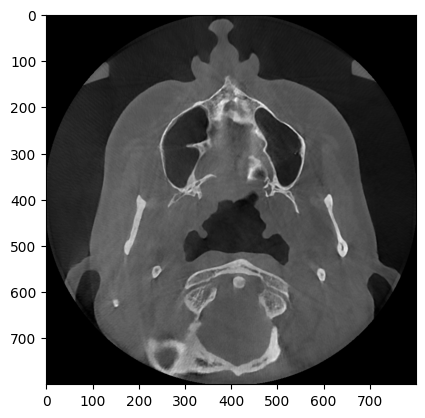

In [ ]:
import matplotlib.pyplot as plt
from pydicom import dcmread
from pydicom.data import get_testdata_file

fpath = "/content/ARSENTEVA IRINA SERGEEVNA_16678_0402.dcm"
ds = dcmread(fpath)

# Normal mode:
print()
print(f"File path........: {fpath}")
print(f"SOP Class........: {ds.SOPClassUID} ({ds.SOPClassUID.name})")
print()

pat_name = ds.PatientName
print(f"Patient's Name...: {pat_name.family_comma_given()}")
print(f"Patient ID.......: {ds.PatientID}")
print(f"Modality.........: {ds.Modality}")
print(f"Study Date.......: {ds.StudyDate}")
print(f"Image size.......: {ds.Rows} x {ds.Columns}")
print(f"Pixel Spacing....: {ds.PixelSpacing}")

# use .get() if not sure the item exists, and want a default value if missing
print(f"Slice location...: {ds.get('SliceLocation', '(missing)')}")

# plot the image using matplotlib
plt.imshow(ds.pixel_array, cmap=plt.cm.gray)
plt.show()

Распечатать набор данных в вашем собственном формате

In [ ]:
import pydicom
from pydicom.data import get_testdata_file

print(__doc__)


def myprint(dataset, indent=0):
    """Go through all items in the dataset and print them with custom format

    Modelled after Dataset._pretty_str()
    """
    dont_print = ['Pixel Data', 'File Meta Information Version']

    indent_string = "   " * indent
    next_indent_string = "   " * (indent + 1)

    for data_element in dataset:
        if data_element.VR == "SQ":   # a sequence
            print(indent_string, data_element.name)
            for sequence_item in data_element.value:
                myprint(sequence_item, indent + 1)
                print(next_indent_string + "---------")
        else:
            if data_element.name in dont_print:
                print("""<item not printed -- in the "don't print" list>""")
            else:
                repr_value = repr(data_element.value)
                if len(repr_value) > 50:
                    repr_value = repr_value[:50] + "..."
                print("{0:s} {1:s} = {2:s}".format(indent_string,
                                                   data_element.name,
                                                   repr_value))


filename = '/content/ARSENTEVA IRINA SERGEEVNA_16678_0402.dcm'
ds = pydicom.dcmread(filename)

myprint(ds)

Automatically created module for IPython interactive environment
 Specific Character Set = 'ISO 2022 IR 144'
 Image Type = 'ORIGINAL/PRIMARY/AXIAL'
 SOP Class UID = '1.2.840.10008.5.1.4.1.1.2'
 SOP Instance UID = '1.2.276.0.7230010.3.1.4.2290667817.35916.16991897...
 Study Date = '20231105'
 Series Date = '20231105'
 Acquisition Date = '20231105'
 Content Date = '20231105'
 Study Time = '160854'
 Series Time = '160854'
 Acquisition Time = '160854'
 Content Time = '160854'
 Accession Number = '0231105155954616'
 Modality = 'CT'
 Manufacturer = 'HDXWILL'
 Institution Name = 'WillMedHos'
 Institution Address = ''
 Referring Physician's Name = ''
 Study Description = ''
 Manufacturer's Model Name = 'DENTRI-C'
 Derivation Description = 'Lossless JPEG compression, selection value 1, poi...
 Derivation Code Sequence
    Code Value = '121327'
    Coding Scheme Designator = 'DCM'
    Code Meaning = 'Full fidelity image'
   ---------
 Patient's Name = 'ARSENTEVA IRINA SERGEEVNA'
 Patient ID = '1

/usr/local/lib/python3.10/dist-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR IS: '0.00'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Загрузите фрагменты КТ и нарисовайте осевые, сагиттальные и корональные изображения



Количество файлов: 2
Пропущено, отсутствует атрибут SliceLocation: 0


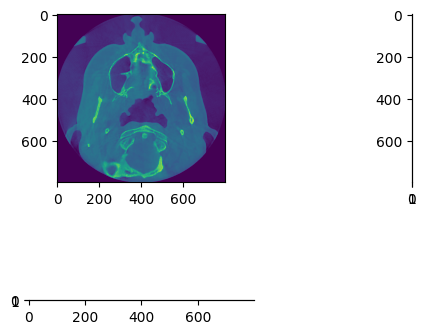

In [ ]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt
import sys

# загрузка файлов DICOM
files = ['/content/ARSENTEVA IRINA SERGEEVNA_16678_0238.dcm', '/content/ARSENTEVA IRINA SERGEEVNA_16678_0402.dcm']

print("Количество файлов: {}".format(len(files)))

# пропускаем файлы без атрибута SliceLocation (например, предварительные просмотры)
slices = []
skipcount = 0
for i, f in enumerate(files):
    dcm_file = pydicom.dcmread(f)
    if hasattr(dcm_file, 'SliceLocation'):
        slices.append(dcm_file)
    else:
        skipcount = skipcount + 1
        print(f"Пропущен файл {i + 1} - отсутствует атрибут SliceLocation")

print("Пропущено, отсутствует атрибут SliceLocation: {}".format(skipcount))

# проверка наличия срезов перед их использованием
if len(slices) == 0:
    print("Срезы не найдены. Завершение работы.")
    sys.exit()

# убедимся, что они расположены в правильном порядке
slices = sorted(slices, key=lambda s: s.SliceLocation)

# соотношения пикселей, предполагая, что все срезы одинаковы
ps = slices[0].PixelSpacing
ss = slices[0].SliceThickness
ax_aspect = ps[1] / ps[0]
sag_aspect = ps[1] / ss
cor_aspect = ss / ps[0]

# создание трехмерного массива
img_shape = list(slices[0].pixel_array.shape)
img_shape.append(len(slices))
img3d = np.zeros(img_shape)

# заполнение трехмерного массива изображениями из файлов
for i, s in enumerate(slices):
    img2d = s.pixel_array
    img3d[:, :, i] = img2d

# построение 3 ортогональных срезов
a1 = plt.subplot(2, 2, 1)
plt.imshow(img3d[:, :, img_shape[2] // 2])
a1.set_aspect(ax_aspect)

a2 = plt.subplot(2, 2, 2)
plt.imshow(img3d[:, img_shape[1] // 2, :])
a2.set_aspect(sag_aspect)

a3 = plt.subplot(2, 2, 3)
plt.imshow(img3d[img_shape[0] // 2, :, :].T)
a3.set_aspect(cor_aspect)

plt.show()


Декодировать и построить график данных формы волны

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from pydicom import dcmread
from pydicom.data import get_testdata_file
from pydicom.waveforms import generate_multiplex

fpath = '/content/ARSENTEVA IRINA SERGEEVNA_16678_0238.dcm'
ds = dcmread(fpath)

# Проверка наличия информации о волновых формах
if hasattr(ds, 'WaveformSequence'):
    # Plot the first channel of each multiplex
    ch_idx = 0
    # We could also use ds.waveform_array()
    fig, axes = plt.subplots(len(ds.WaveformSequence))
    generator = generate_multiplex(ds, as_raw=False)
    for ax, mplx, arr in zip(axes, ds.WaveformSequence, generator):
        nr_channels = mplx.NumberOfWaveformChannels
        nr_samples = mplx.NumberOfWaveformSamples
        sampling_fq = mplx.SamplingFrequency  # in Hz
        mplx_label = mplx.MultiplexGroupLabel

        ch_item = mplx.ChannelDefinitionSequence[ch_idx]

        x = np.arange(0, nr_samples / sampling_fq, 1 / sampling_fq)
        x_units = "seconds"

        # ChannelSensitivityUnitsSequence is type 1C, so check it's there
        if "ChannelSensitivityUnitsSequence" in ch_item:
            y_units = ch_item.ChannelSensitivityUnitsSequence[0].CodeMeaning
        else:
            y_units = "unitless"

        # Description of the channel source
        ch_source = ch_item.ChannelSourceSequence[0].CodeMeaning

        ax.plot(x, arr[..., ch_idx])
        ax.set_title(f"{mplx_label}: {ch_source}")
        ax.set_xlabel(f"({x_units})")
        ax.set_ylabel(f"({y_units})")

    fig.tight_layout(pad=1)
    plt.show()
else:
    print("DICOM файл не содержит информации о волновых формах.")


DICOM файл не содержит информации о волновых формах.
